In [29]:
#A program that classifies images of birds
##########################################
#                                        #
#               @Cole_Hanson             #
#                                        #
##########################################
'''
 ^ ^
(O,O)
(   )
-"-"---dwb---------------------------------
'''

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


In [30]:
#Mount Drive
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
!ls "/content/drive/My Drive"

Mounted at /content/drive
'Colab Notebooks'   data  'Getting started.pdf'   tf_logs


In [31]:
#Setup data to be read
DATA_DIR = "/content/drive/My Drive/data/train"
VALIDATION_DIR = "/content/drive/My Drive/data/validation"
LOG_DIR = "/content/drive/My Drive/tf_logs"

CATEGORIES = ["american_goldfinch", "american_robin", "black-capped_chickadee", "cardinal", "cedar_waxwing","common_grackle", "downy_woodpecker", "house_finch", "house_wren", "mourning_dove", "read-headed_woodpecker", "ruby-throated_hummingbird", "white-breasted_nuthatch", "white-throated_sparrow"]

In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def create_training_data():
    '''
    create training data set
    '''
    batch_size = 32
    epochs = 7
    IMG_HEIGHT = 128
    IMG_WIDTH = 128
    train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
  
    train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                  directory=DATA_DIR,
                                                  shuffle=True,
                                                  target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                  class_mode='categorical')
    
    return train_data_gen
    

2.2.0


In [33]:
def create_validation_data():
    '''
    create validation data set
    '''
    batch_size = 32
    epochs = 7
    IMG_HEIGHT = 128
    IMG_WIDTH = 128
    validation_image_generator = ImageDataGenerator(rescale=1./255, 
                                                  rotation_range = 40, 
                                                  width_shift_range = 0.2, 
                                                  height_shift_range = 0.2,
                                                  shear_range = 0.2,
                                                  zoom_range = 0.2, 
                                                  horizontal_flip = True)

    validation_data_gen = validation_image_generator.flow_from_directory(batch_size = batch_size,
                                                  directory=VALIDATION_DIR,
                                                  shuffle=True,
                                                  target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                  class_mode='categorical')
    
    return validation_data_gen
    

In [34]:
def plotImages(images_arr):
    '''
      plot images in a given array of images
    '''
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


Found 736 images belonging to 14 classes.


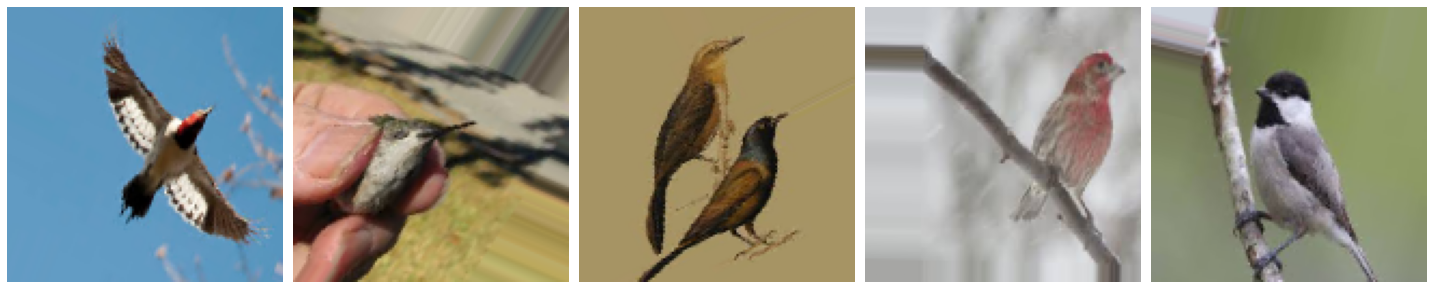

In [35]:
#test validation data
val = create_validation_data()
sample_validation_images, _ = next(val)
validation_n = len(val)
#visualize
plotImages(sample_validation_images[:5])


Found 1882 images belonging to 14 classes.


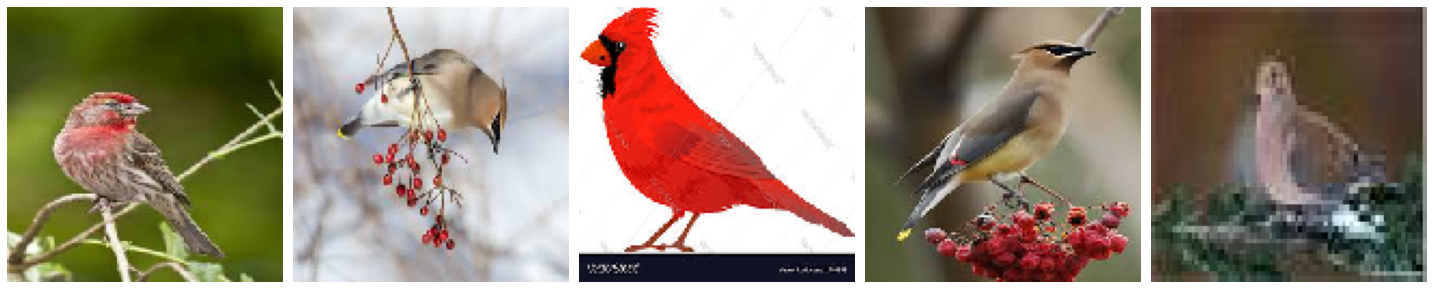

In [36]:
#test training
training_data = create_training_data()
n = len(training_data)
sample_training_images, _ = next(training_data)
validation_n = len(val)
plotImages(sample_training_images[:5])

In [37]:
#create CNN model
model = tf.keras.Sequential([
tf.keras.layers.Conv2D(16, (3, 3), activation = tf.nn.relu, input_shape = (128, 128, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Dropout(.2),
tf.keras.layers.Conv2D(32, (3, 3), activation = tf.nn.relu),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Dropout(.2),
tf.keras.layers.Conv2D(64, (3, 3), activation = tf.nn.relu),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Dropout(.2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(14, activation=tf.nn.sigmoid)
])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 63, 63, 16)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 64)       

In [43]:
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

history = model.fit(
training_data,
batch_size = 10,
steps_per_epoch= len(training_data) // batch_size,
epochs= 12,
validation_data= val,
validation_steps= len(val) // batch_size)

Epoch 1/12
1/1 [==============================] - ETA: 0s - loss: 2.6280 - accuracy: 0.1562

UnboundLocalError: ignored